In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

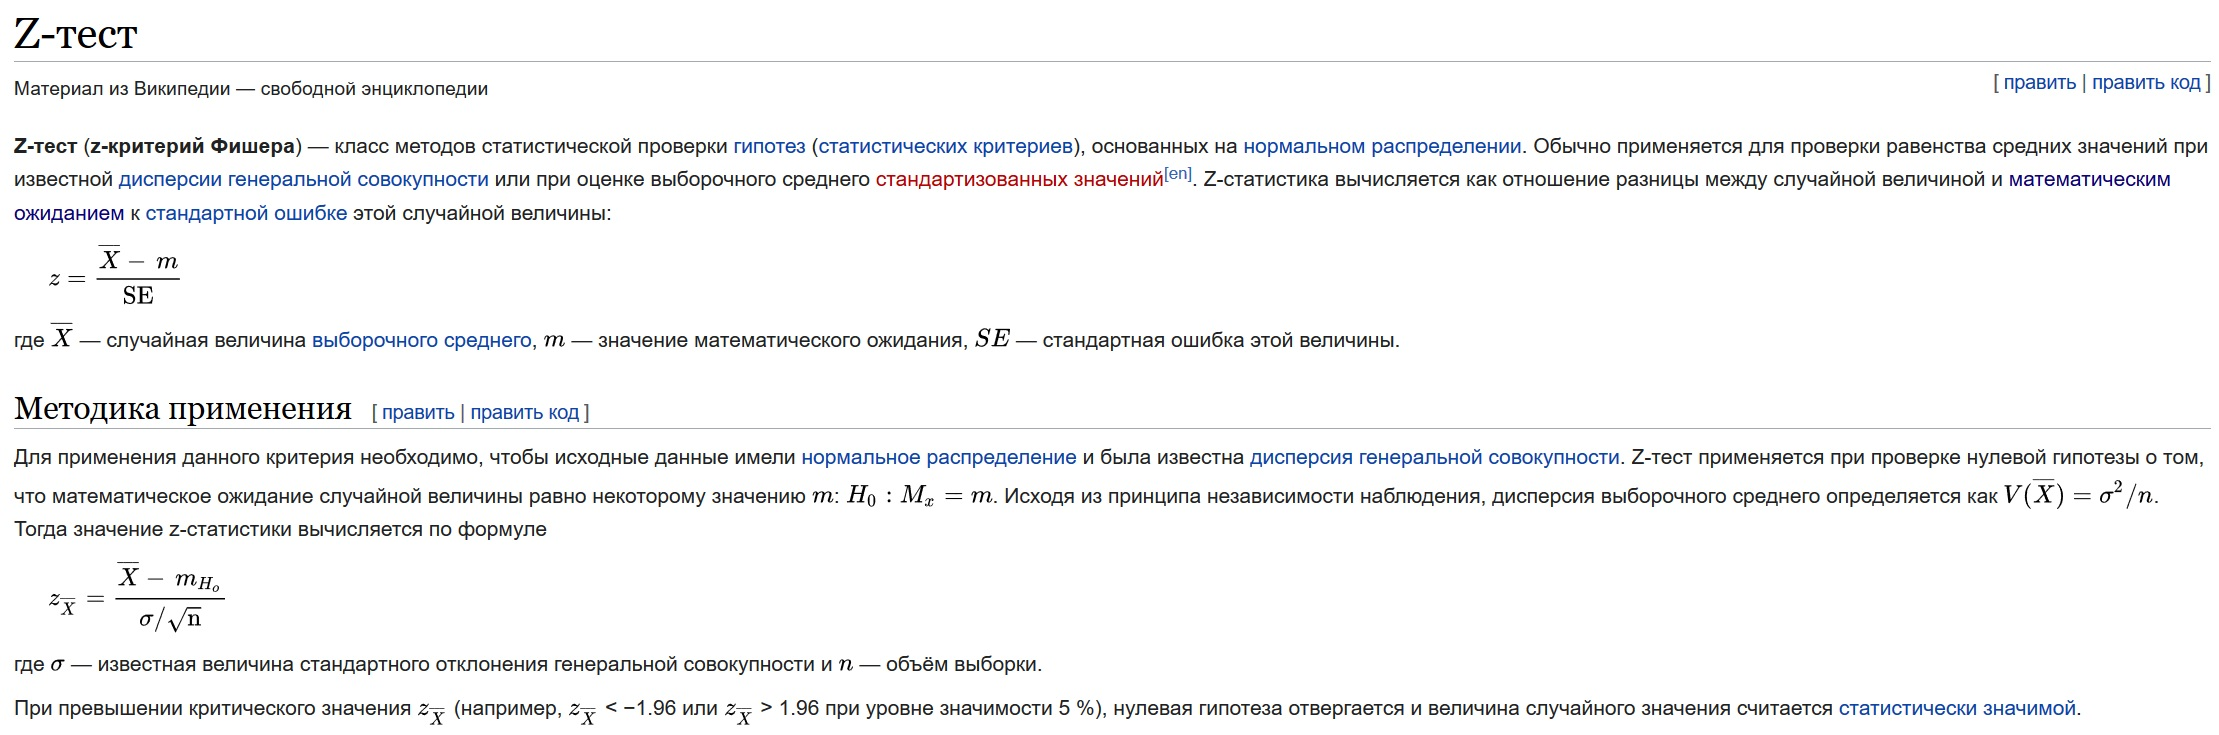

Условие: пара ученых проводили серию одинаковых экспериментов, с целью устанновить наиболее точное (среднее) значение
измеряемой величины. В первый день их среднее значение было 5000, на следующий день ребята из соседней лабы зашли в гости на чай, после чаепития эксперимент дал результат - 4096, на третий день - 5001. Требуется узнать, кто вмешался в результат - судьба или конкуренты из другой лабы. Погрешность прибора 1%

Н0 : это все рок судьбы;
Н1 : конкуренты-завистники заменили в приборе импортную термопару на ржавую со свалки, пока ученые отдыхали

In [101]:
ex_1 = np.random.normal(5000, 1, 3785)
ex_2 = np.random.normal(4096, 1, 3697)
ex_3 = np.random.normal(5001, 1, 3988)

Text(0.5, 1.0, 'Day 3')

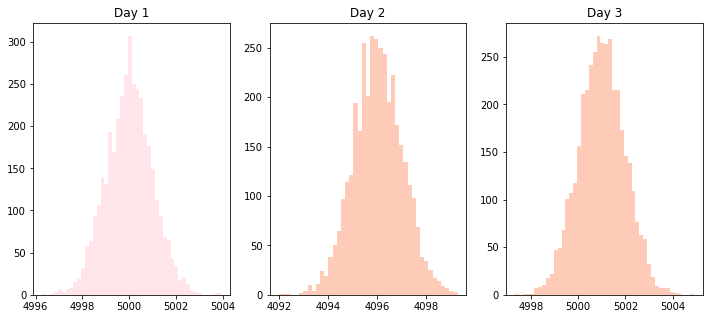

In [102]:
f=plt.figure(figsize=(12,5))

ax=f.add_subplot(131)
sns.distplot(ex_1,color = 'pink',hist = True, kde = False,ax = ax)
ax.set_title('Day 1')

ax=f.add_subplot(132)
sns.distplot(ex_2,color = 'coral',hist = True, kde = False,ax = ax)
ax.set_title('Day 2')

ax=f.add_subplot(133)
sns.distplot(ex_3,color = 'coral',hist = True, kde = False,ax = ax)
ax.set_title('Day 3')

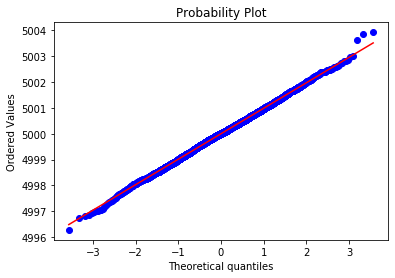

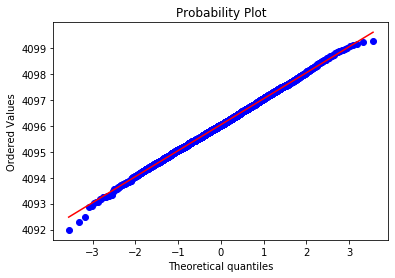

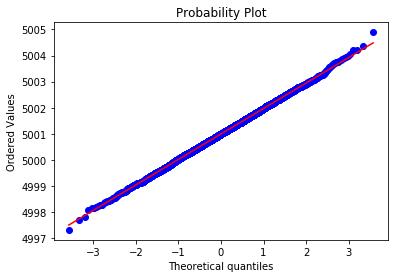

In [103]:
#Проверим распределениz на нормальность
stats.probplot(ex_1, dist="norm", plot=plt)
plt.show()

stats.probplot(ex_2, dist="norm", plot=plt)
plt.show()

stats.probplot(ex_3, dist="norm", plot=plt)
plt.show()

In [104]:
days = [ex_1,ex_2,ex_3]

for day in days:
    W_value,p_value = stats.shapiro(day)
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Normal W= 0.9993 p-value 0.1474
Normal W= 0.9993 p-value 0.1924
Normal W= 0.9998 p-value 0.9759


Примем уровень значимости равным 5% (0,05), в таком случае критические значения z = +-1,96 (лево- или правосторонней гипотезы)
Проверим стандартную ошибку среднего генеральной совокупности (1%):

In [105]:
n1 = len(ex_1)

var_1 = np.var(ex_1,ddof = 1)

sd_1 = np.sqrt(var_1)

sem = np.sqrt(sd_1**2/n1)

print('Стандартная ошибка = ',sem)

Стандартная ошибка =  0.016027093042169992


Посчитаем теперь z-критерий для проверяемого значения (левосторонняя гипотеза):

In [106]:
z = (4096 - np.mean(ex_1))/sem

if z < -1.96:
    print('Отвергаем нулевую гипотезу','\nz - критерий = ',z)
else:
    print('Принимаем нулевую гипотезу','\nz - критерий = ',z)

Отвергаем нулевую гипотезу 
z - критерий =  -56404.63446485188


Для правосторонней гипотезы:

In [107]:
z = (5001 - np.mean(ex_1))/sem

if z > 1.96:
    print('Отвергаем нулевую гипотезу','\nz - критерий = ',z)
else:
    print('Принимаем нулевую гипотезу','\nz - критерий = ',z)

Отвергаем нулевую гипотезу 
z - критерий =  62.249306197054004


Для двусторонней гипотезы:
alpha/2 = 0,05/2 = 0,025 => crit z = +-2,24

In [108]:
z = (4096 - np.mean(ex_1))/sem

if z < -2.24 or z > 2.24:
    print('Отвергаем нулевую гипотезу','\nz - критерий = ',z)
else:
    print('Принимаем нулевую гипотезу','\nz - критерий = ',z)

Отвергаем нулевую гипотезу 
z - критерий =  -56404.63446485188


Конкретно для данной ситуации имеет место лишь двусторонняя гипотеза, но мы рассмотрели все случаи
и теперь знаем, что результаты в первый день экспериментов были наиболее удачными